# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# import API key
from api_keys import api_key

# incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# output File (CSV)
output_data_file = 'output_data/city.list.json'

# range of latitudes and longitudes
# lat_range = (-90, 90)
# lng_range = (-180, 180)

## Generate Cities List

In [5]:
# suggested starter code

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

In [6]:
lats

array([-63.63931004, -49.4359976 ,  71.30111813, ..., -31.0961542 ,
        73.40246349, -68.40379513])

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# define temp units
temp_units = "imperial"

# URL for Weather Map API call
ow_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

In [19]:
response = requests.get(ow_url + 'New York').json()
response['name']

'New York'

In [20]:
# set lists for the dataframe
city_name = []
cloud = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
country = []

# set initial counts
count_one = 0
set_one = 1

# loop thru cities
# need to skip cities withno data
for city in cities:
    try:
        response = requests.get(ow_url + city.replace(" ","&")).json()
        cloud.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_name.append(response['name'])
        else:
            count_one += 1
            city_name.append(response['name'])
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | husavik
Processing Record 4 of Set 1 | upernavik
Processing Record 5 of Set 1 | dikson
Processing Record 6 of Set 1 | hobyo
Processing Record 7 of Set 1 | coahuayana
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | pau brasil
Processing Record 11 of Set 1 | truro
City not found. Skipping...
City not found. Skipping...
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | aykhal
Processing Record 14 of Set 1 | saskylakh
Processing Record 15 of Set 1 | norman wells
Processing Record 16 of Set 1 | vila franca do campo
Processing Record 17 of Set 1 | puerto ayora
City not found. Skipping...
Processing Record 18 of Set 1 | khor
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 22 of Set 1 | ilulissa

City not found. Skipping...
Processing Record 35 of Set 4 | jardim
Processing Record 36 of Set 4 | chapais
Processing Record 37 of Set 4 | port alfred
Processing Record 38 of Set 4 | butaritari
Processing Record 39 of Set 4 | faanui
Processing Record 40 of Set 4 | kenai
Processing Record 41 of Set 4 | donskoye
Processing Record 42 of Set 4 | ponta do sol
City not found. Skipping...
Processing Record 43 of Set 4 | kudahuvadhoo
Processing Record 44 of Set 4 | khash
Processing Record 45 of Set 4 | zeya
Processing Record 46 of Set 4 | maloy
Processing Record 47 of Set 4 | rumphi
Processing Record 48 of Set 4 | kropotkin
City not found. Skipping...
Processing Record 49 of Set 4 | stephenville
Processing Record 1 of Set 5 | namibe
Processing Record 2 of Set 5 | yakeshi
Processing Record 3 of Set 5 | tura
Processing Record 4 of Set 5 | antofagasta
Processing Record 5 of Set 5 | san cristobal
Processing Record 6 of Set 5 | nuevitas
City not found. Skipping...
Processing Record 7 of Set 5 | bam

Processing Record 23 of Set 8 | lorengau
Processing Record 24 of Set 8 | gizo
Processing Record 25 of Set 8 | honningsvag
Processing Record 26 of Set 8 | mahebourg
Processing Record 27 of Set 8 | pyaozerskiy
Processing Record 28 of Set 8 | kahone
Processing Record 29 of Set 8 | jaegerspris
City not found. Skipping...
Processing Record 30 of Set 8 | pisco
Processing Record 31 of Set 8 | mahajanga
Processing Record 32 of Set 8 | portland
City not found. Skipping...
Processing Record 33 of Set 8 | port augusta
Processing Record 34 of Set 8 | isabela
Processing Record 35 of Set 8 | praia da vitoria
Processing Record 36 of Set 8 | kashkhatau
Processing Record 37 of Set 8 | fairbanks
Processing Record 38 of Set 8 | sivaki
Processing Record 39 of Set 8 | kijang
Processing Record 40 of Set 8 | boyolangu
Processing Record 41 of Set 8 | margate
Processing Record 42 of Set 8 | college
Processing Record 43 of Set 8 | namatanai
Processing Record 44 of Set 8 | kathu
Processing Record 45 of Set 8 | u

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City": city_name,
    "Country": country,
    "Lat": lat,
    "Lng": lng,
    "Date": date,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed,
    "Humidity": humidity,
    "Cloudiness": cloud
}

In [25]:
# dictionary to dataframe
weather_df = pd.DataFrame(weather_dict)

# preview
weather_df.head()

,City,Country,Lat,Lng,Date,Max Temp,Wind Speed,Humidity,Cloudiness
0,Punta,PH,14.18,121.12,1566176811,87.01,4.70,74,40
1,Mataura,NZ,-46.19,168.86,1566176811,50.00,4.00,63,43
2,Husavik,CA,50.56,-96.99,1566176592,70.00,8.01,28,2
3,Upernavik,GL,72.79,-56.15,1566176811,41.34,2.73,69,0
4,Dikson,RU,73.51,80.55,1566176812,40.62,10.38,92,100


In [23]:
# at least 500 cities
len(weather_df)

531

In [13]:
# dataframe to csv
weather_csv = weather_df.to_csv
                                
#preview
weather_csv

<bound method NDFrame.to_csv of                           City Country    Lat     Lng        Date  Max Temp  \
0                 punta arenas      PH  14.18  121.12  1566175704     86.00   
1                      mataura      NZ -46.19  168.86  1566175705     50.00   
2                      husavik      CA  50.56  -96.99  1566175705     72.00   
3                    upernavik      GL  72.79  -56.15  1566175705     41.34   
4                       dikson      RU  73.51   80.55  1566175705     40.62   
5                        hobyo      SO   5.35   48.53  1566175705     74.10   
6                   coahuayana      MX  18.62 -100.35  1566175706     82.38   
7                        kapaa      US  22.08 -159.32  1566175706     89.60   
8                     hermanus      ZA -34.42   19.24  1566175706     57.00   
9                   pau brasil      FR  43.30   -0.37  1566175706     71.01   
10                       truro      GB  50.26   -5.05  1566175706     59.00   
11                  

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

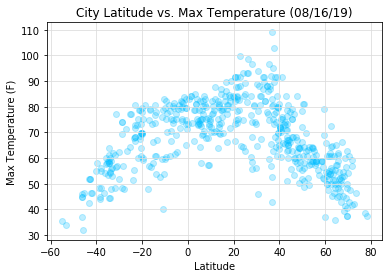

In [55]:
# scatter plots
# Lattitude vs Temperature

plt.scatter(weather_df["Lat"],weather_df["Max Temp"],alpha='0.25',facecolors='deepskyblue')
plt.title("City Latitude vs. Max Temperature (08/16/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="gainsboro")

# save the fig
plt.savefig('lat-v-temp.pdf')

plt.show()

#### Latitude vs. Humidity Plot

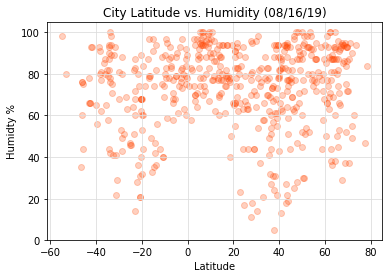

In [54]:
# scatter plots
# Lattitude vs Humidity

plt.scatter(weather_df["Lat"],weather_df["Humidity"],alpha='0.25',facecolors='orangered')
plt.title("City Latitude vs. Humidity (08/16/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidty %")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="gainsboro")

# save the fig
plt.savefig('lat-v-humid.pdf')

plt.show()

#### Latitude vs. Cloudiness Plot

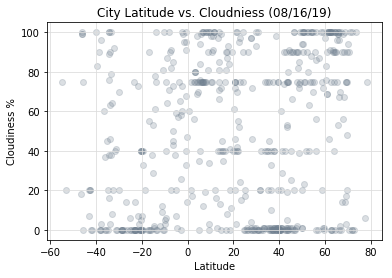

In [53]:
# scatter plots
# Lattitude vs Cloudiness

plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],alpha='0.25',facecolors='slategrey')
plt.title("City Latitude vs. Cloudniess (08/16/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="gainsboro")

# save the fig
plt.savefig('lat-v-cloud.pdf')

plt.show()

#### Latitude vs. Wind Speed Plot

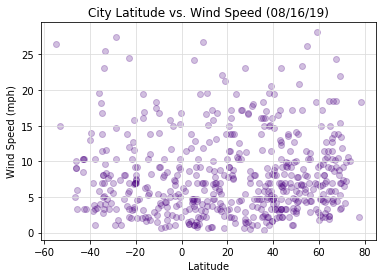

In [52]:
# scatter plots
# Lattitude vs Wind Speed

plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],alpha='0.25',facecolors='indigo')
plt.title("City Latitude vs. Wind Speed (08/16/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="gainsboro")

# save the fig
plt.savefig('lat-v-wind.pdf')

plt.show()